In [35]:
import numpy as np
import numpy as np
import scipy
import matplotlib.pyplot as plt
import matplotlib 
%matplotlib inline

## smooth gradient

In [2]:
infds = np.load("results/smooth_grad/infds.npy")/196
senss = np.load("results/smooth_grad/senss.npy")/196
sigmas = np.load("results/smooth_grad/sigmas.npy")

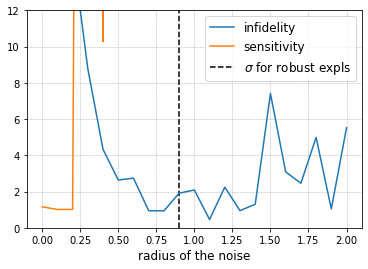

In [3]:
plt.plot(np.arange(21)*0.1, infds, label="infidelity")
plt.plot(np.arange(21)*0.1, senss, label="sensitivity")
plt.vlines(np.mean(sigmas), ymin=0, ymax=12, linestyles='dashed', label=r"$\sigma$ for robust expls");
plt.ylim([0, 12])
plt.legend(fontsize=12)
plt.xlabel("radius of the noise", fontsize=12)
plt.grid(linestyle='--', linewidth=0.5)
# plt.savefig("infidelity_sensitivity_sg_imagenet.jpg", dpi=300, bbox_inches='tight', pad_inches=0.05)

In [6]:
infds

array([93.13469297, 58.39102083, 25.99748514, 26.1030643 , 11.87583918,
        4.29503223,  7.28788973,  5.20957016,  8.21211405,  2.27239071,
        2.76677814,  1.73328355,  0.56192814,  2.27474024,  1.25205288,
        0.61213841,  1.94199572,  0.50640492,  3.27285297,  3.33242527,
        7.19296484])

## uniform gradient

In [4]:
infds = np.load("results/uniform_grad/infds.npy")/196
senss = np.load("results/uniform_grad/senss.npy")/196
sigmas = np.load("results/uniform_grad/sigmas.npy")

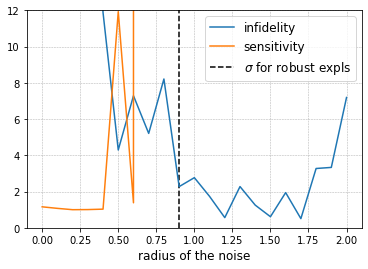

In [5]:
plt.plot(np.arange(21)*0.1, infds, label="infidelity")
plt.plot(np.arange(21)*0.1, senss, label="sensitivity")
plt.vlines(np.mean(sigmas), ymin=0, ymax=12, linestyles='dashed', label=r"$\sigma$ for robust expls");
plt.ylim([0, 12])
plt.legend(fontsize=12)
plt.xlabel("radius of the noise", fontsize=12)
plt.grid(linestyle='--', linewidth=0.5)
# plt.savefig("infidelity_sensitivity_sg_imagenet.jpg", dpi=300, bbox_inches='tight', pad_inches=0.05)

In [7]:
infds

array([93.13469297, 58.39102083, 25.99748514, 26.1030643 , 11.87583918,
        4.29503223,  7.28788973,  5.20957016,  8.21211405,  2.27239071,
        2.76677814,  1.73328355,  0.56192814,  2.27474024,  1.25205288,
        0.61213841,  1.94199572,  0.50640492,  3.27285297,  3.33242527,
        7.19296484])

## $\beta$-smoothing

In [8]:
infds = np.load("results/softplus/infds.npy")/196
senss = np.load("results/softplus/senss.npy")/196
# sigmas = np.load("results/softplus/sigmas.npy")

In [9]:
beta_values = np.arange(0.0, 10.1, 0.5)

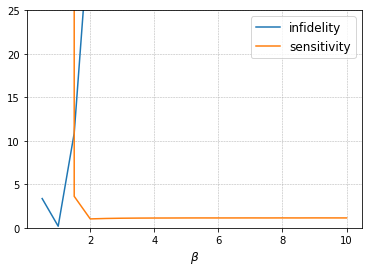

In [10]:
plt.plot(beta_values, infds, label="infidelity")
plt.plot(beta_values, senss, label="sensitivity");
plt.ylim([0, 25])
plt.legend(fontsize=12)
plt.xlabel(r"$\beta$", fontsize=12)
plt.grid(linestyle='--', linewidth=0.5)
# plt.savefig("infidelity_sensitivity_sg_imagenet.jpg", dpi=300, bbox_inches='tight', pad_inches=0.05)

### square perturbation

In [39]:
infds_grad1 = np.concatenate((np.load("results_square/saliency_square_pert/infds1.npy"),
                            np.load("results_square/saliency_square_pert/infds_80.npy")))
infds_grad2 = np.concatenate((np.load("results_square/saliency_square_pert/infds2.npy"),
                            np.load("results_square/saliency_square_pert/infds_80_1.npy")))
infds_grad = np.stack((infds_grad1, infds_grad2), axis=0)
# senss_grad = np.load("results_square/saliency_square_pert/senss.npy")
####
infds_smooth_grad1 = np.concatenate((np.load("results_square/smooth_grad_square_pert/infds1.npy"),
                            np.load("results_square/smooth_grad_square_pert/infds_80.npy")))
infds_smooth_grad2 = np.concatenate((np.load("results_square/smooth_grad_square_pert/infds2.npy"),
                            np.load("results_square/smooth_grad_square_pert/infds_80_1.npy")))
infds_smooth_grad = np.stack((infds_smooth_grad1, infds_smooth_grad2), axis=0)
# senss_smooth_grad = np.load("results_square/smooth_grad_square_pert/senss.npy")
####
infds_uniform_grad1 = np.concatenate((np.load("results_square/uniform_grad_square_pert/infds1.npy"),
                            np.load("results_square/uniform_grad_square_pert/infds_80.npy")))
infds_uniform_grad2 = np.concatenate((np.load("results_square/uniform_grad_square_pert/infds2.npy"),
                            np.load("results_square/uniform_grad_square_pert/infds_80_1.npy")))
infds_uniform_grad = np.stack((infds_uniform_grad1, infds_uniform_grad2), axis=0)
# senss_uniform_grad = np.load("results_square/uniform_grad_square_pert/senss.npy")
####
infds_softplus1 = np.concatenate((np.load("results_square/softplus_square_pert/infds1.npy"),
                            np.load("results_square/softplus_square_pert/infds_80.npy")))
infds_softplus2 = np.concatenate((np.load("results_square/softplus_square_pert/infds2.npy"),
                            np.load("results_square/softplus_square_pert/infds_80_1.npy")))
infds_softplus = np.stack((infds_softplus1, infds_softplus2), axis=0)
# senss_softplus = np.load("results_square/softplus_square_pert/senss.npy")

In [40]:
infds_grad = np.mean(infds_grad, axis=0)
infds_smooth_grad = np.mean(infds_smooth_grad, axis=0)
infds_uniform_grad = np.mean(infds_uniform_grad, axis=0)
infds_softplus = np.mean(infds_softplus, axis=0)


In [41]:
len(infds_softplus)

100

In [42]:
print("Inf(Grad): {} +- {}".format(np.mean(infds_grad), np.std(infds_grad)))
print("Inf(Smooth Grad): {} +- {}".format(np.mean(infds_smooth_grad), np.std(infds_smooth_grad)))
print("Inf(Uniform Grad): {} +- {}".format(np.mean(infds_uniform_grad), np.std(infds_uniform_grad)))
print("Inf(Softplus): {} +- {}".format(np.mean(infds_softplus), np.std(infds_softplus)))

Inf(Grad): 2.1758399483184636 +- 2.64087725990707
Inf(Smooth Grad): 2.118850937387523 +- 2.5122373622419425
Inf(Uniform Grad): 2.119221670161258 +- 2.510187521957166
Inf(Softplus): 2.145360229512372 +- 2.475745480494092


In [43]:
infds_grad = np.concatenate((infds_grad,
                             np.load("results_square/saliency_square_pert/infds_100.npy")))
# senss_grad = np.load("results_square/saliency_square_pert/senss.npy")
####
infds_smooth_grad = np.concatenate((infds_smooth_grad,
                                    np.load("results_square/smooth_grad_square_pert/infds_100.npy")))
# senss_smooth_grad = np.load("results_square/smooth_grad_square_pert/senss.npy")
####
infds_uniform_grad = np.concatenate((infds_uniform_grad,
                            np.load("results_square/uniform_grad_square_pert/infds_100.npy")))
# senss_uniform_grad = np.load("results_square/uniform_grad_square_pert/senss.npy")
####
infds_softplus = np.concatenate((infds_softplus,
                            np.load("results_square/softplus_square_pert/infds_100.npy")))
# senss_softplus = np.load("results_square/softplus_square_pert/senss.npy")

In [44]:
len(infds_softplus)

200

In [53]:
print("Inf(Grad): {} +- {}".format(np.mean(infds_grad[infds_softplus<10]), np.std(infds_grad[infds_softplus<10])))
print("Inf(Smooth Grad): {} +- {}".format(np.mean(infds_smooth_grad[infds_softplus<10]), np.std(infds_smooth_grad[infds_softplus<10])))
print("Inf(Uniform Grad): {} +- {}".format(np.mean(infds_uniform_grad[infds_softplus<10]), np.std(infds_uniform_grad[infds_softplus<10])))
print("Inf(Softplus): {} +- {}".format(np.mean(infds_softplus[infds_softplus<10]), np.std(infds_softplus[infds_softplus<10])))

Inf(Grad): 2.258192198586249 +- 2.807656731523647
Inf(Smooth Grad): 2.207559858789645 +- 2.729005241606422
Inf(Uniform Grad): 2.2036148003767324 +- 2.6356189110577737
Inf(Softplus): 1.8351580447251394 +- 1.701117929405407


In [49]:
k=30

In [167]:
inds=np.where(infds_softplus < np.percentile(infds_softplus, 90))[0]

In [184]:
len(inds)

45

In [22]:
# print("Inf(Grad): {} +- {}".format(np.mean(infds_grad[inds]), np.std(infds_grad)))
# print("Inf(Smooth Grad): {} +- {}".format(np.mean(infds_smooth_grad[inds]), np.std(infds_smooth_grad)))
# print("Inf(Uniform Grad): {} +- {}".format(np.mean(infds_uniform_grad[inds]), np.std(infds_uniform_grad)))
# print("Inf(Softplus): {} +- {}".format(np.mean(infds_softplus[inds]), np.std(infds_softplus[inds])))


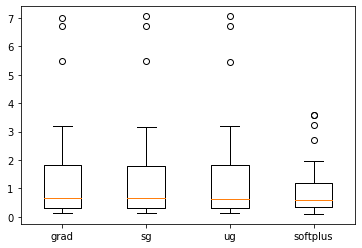

In [187]:
plt.boxplot([infds_grad[inds],
            infds_smooth_grad[inds],
            infds_uniform_grad[inds],
            infds_softplus[inds]], labels=["grad", "sg", "ug", "softplus"]);


In [177]:
infds_grad = np.load("results_square_2_cifar/saliency_square_pert/infds.npy")
senss_grad = np.load("results_square_2_cifar/saliency_square_pert/senss.npy")
####
infds_smooth_grad = np.load("results_square_2_cifar/smooth_grad_square_pert/infds.npy")
senss_smooth_grad = np.load("results_square_2_cifar/smooth_grad_square_pert/senss.npy")
####
infds_uniform_grad = np.load("results_square_2_cifar/uniform_grad_square_pert/infds.npy")
senss_uniform_grad = np.load("results_square_2_cifar/uniform_grad_square_pert/senss.npy")
####
infds_softplus = np.load("results_square_2_cifar/softplus_square_pert/infds.npy")
senss_softplus = np.load("results_square_2_cifar/softplus_square_pert/senss.npy")

In [165]:
print("Inf(Grad): {} +- {}".format(np.mean(infds_grad), np.std(infds_grad)))
print("Inf(Smooth Grad): {} +- {}".format(np.mean(infds_smooth_grad), np.std(infds_smooth_grad)))
print("Inf(Uniform Grad): {} +- {}".format(np.mean(infds_uniform_grad), np.std(infds_uniform_grad)))
print("Inf(Softplus): {} +- {}".format(np.mean(infds_softplus), np.std(infds_softplus)))

Inf(Grad): 30.183960900331503 +- 28.569447467521332
Inf(Smooth Grad): 21.538902599613586 +- 26.39171089812918
Inf(Uniform Grad): 20.952071699018862 +- 25.387550382490872
Inf(Softplus): 16.467262831173958 +- 21.122579595149485


In [38]:
print("Sens(Grad): ", np.mean(senss_grad))
print("Sens(Smooth Grad): ", np.mean(senss_smooth_grad))
print("Sens(Uniform Grad): ", np.mean(senss_uniform_grad))
print("Sens(Softplus): ", np.mean(senss_softplus))

Sens(Grad):  1.1508831
Sens(Smooth Grad):  2.1863722e+16
Sens(Uniform Grad):  145004.06
Sens(Softplus):  inf


In [39]:
len(infds_grad)

100

### Ad-hoc methods - square perturbation

In [5]:
infds_standard = np.load("results_cifar_square/standardinfds.npy")
senss_standard = np.load("results_cifar_square/standardsenss.npy")
####
infds_cure = np.load("results_cifar_square/CURE/infds.npy")
senss_cure = np.load("results_cifar_square/CURE/senss.npy")
####
infds_adv_train = np.load("results_cifar_square/adv_train/infds.npy")
senss_adv_train = np.load("results_cifar_square/adv_train/senss.npy")

In [6]:
print("Inf(standard): {} +- {}".format(np.mean(infds_standard), np.std(infds_standard)))
print("Inf(CURE): {} +- {}".format(np.mean(infds_cure), np.std(infds_cure)))
print("Inf(adversarial training): {} +- {}".format(np.mean(infds_adv_train), np.std(infds_adv_train)))

Inf(standard): 5.691571986087501 +- 4.449321328448944
Inf(CURE): 0.5948989321481764 +- 0.73762966968402
Inf(adversarial training): 1.5674760889085644 +- 2.0593396372604555


In [7]:
np.percentile(infds_standard, 50)

4.445936126946856